In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import scipy.stats as stats
plt.rcParams['savefig.dpi'] = 600
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec

## 1) Generate the non-redundant set of F3-F4 mutations

In [3]:
F3F4_seq = "ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTTTTTTTTTTGCGAAATTAAAAAGTTCATTTTCAATTCGACAATGAGATCTACAAGCCATTGTTTTATGTTGATGAGAGCCAGCTTAAAGAGTTAAAAATTTCATAGCTA"

For substitutions:

In [5]:
sub_list = []

In [6]:
for pos, nt in enumerate(F3F4_seq):
    pos_ref = pos + 52

    for nt_char in ['A', 'T', 'G', 'C']:

        if nt_char == nt:
            continue
        else:
            mut_seq = F3F4_seq[:pos] + nt_char + F3F4_seq[pos+1:]
            mut_code = f'S-{pos_ref}_1nt_{nt}to{nt_char}'
            current_dict = {'Seq': mut_seq, 'Code': mut_code, 'Position': pos_ref, 'Mutation': nt_char}
            
            sub_list += [current_dict] 

In [7]:
sub_df = pd.DataFrame(sub_list)

In this case, the set is already non-redundant

For insertions:

In [10]:
ins_list = []

In [11]:
for pos, nt in enumerate(F3F4_seq):
    pos_ref = pos + 52

    for nt_char in ['A', 'T', 'G', 'C']:
        mut_seq = F3F4_seq[:pos+1] + nt_char + F3F4_seq[pos+1:]

        mut_code = f'I-{pos_ref}_1nt_-to{nt_char}'
        
        current_dict = {'Seq': mut_seq, 'Code': mut_code, 'Position': pos_ref, 'Mutation': f'{nt_char} insertion'}

        ins_list += [current_dict] 

In [12]:
ins_df = pd.DataFrame(ins_list)

In [13]:
index_tokeep = []
for seq in ins_df['Seq'].unique():
    df_subset = ins_df[ins_df['Seq'] == seq].copy().sort_values(by=['Position'], ascending=True)
    min_pos = np.min(df_subset['Position'])
    current_ind = df_subset[df_subset['Position'] == min_pos].index[0]
    index_tokeep += [current_ind]

In [14]:
# non redundant set
ins_final = ins_df.loc[index_tokeep,:].copy().reset_index(drop=True)

In [15]:
ins_final

,Seq,Code,Position,Mutation
0,AATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTT...,I-52_1nt_-toA,52,A insertion
1,ATTTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTT...,I-52_1nt_-toT,52,T insertion
2,AGTTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTT...,I-52_1nt_-toG,52,G insertion
3,ACTTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTT...,I-52_1nt_-toC,52,C insertion
4,ATATCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTT...,I-53_1nt_-toA,53,A insertion
...,...,...,...,...
458,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,I-204_1nt_-toG,204,G insertion
459,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,I-204_1nt_-toC,204,C insertion
460,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,I-205_1nt_-toT,205,T insertion
461,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,I-205_1nt_-toG,205,G insertion


For deletions:

In [17]:
del_list = []

In [18]:
for pos, nt in enumerate(F3F4_seq):
    pos_ref = pos + 52
    
    mut_seq = F3F4_seq[:pos] + F3F4_seq[pos+1:]

    mut_code = f'D-{pos_ref}_1nt_{nt}to-'
        
    current_dict = {'Seq': mut_seq, 'Code': mut_code, 'Position': pos_ref, 'Mutation': 'Deletion'}

    del_list += [current_dict] 

In [19]:
del_df = pd.DataFrame(del_list)

In [20]:
index_tokeep = []
for seq in del_df['Seq'].unique():
    df_subset = del_df[del_df['Seq'] == seq].copy().sort_values(by=['Position'], ascending=True)
    min_pos = np.min(df_subset['Position'])
    current_ind = df_subset[df_subset['Position'] == min_pos].index[0]
    index_tokeep += [current_ind]

In [21]:
# non redundant set
del_final = del_df.loc[index_tokeep,:].copy().reset_index(drop=True)

In [22]:
del_final

,Seq,Code,Position,Mutation
0,TTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTTT...,D-52_1nt_Ato-,52,Deletion
1,ATCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTTT...,D-53_1nt_Tto-,53,Deletion
2,ATTCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTTT...,D-55_1nt_Cto-,55,Deletion
3,ATTCCTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTTT...,D-57_1nt_Tto-,57,Deletion
4,ATTCCTTCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTTT...,D-59_1nt_Gto-,59,Deletion
...,...,...,...,...
91,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,D-201_1nt_Ato-,201,Deletion
92,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,D-202_1nt_Gto-,202,Deletion
93,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,D-203_1nt_Cto-,203,Deletion
94,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,D-204_1nt_Tto-,204,Deletion


In [23]:
# Complete non-redundant set of variants
variants_nodup = pd.concat([sub_df, ins_final, del_final]).reset_index(drop=True)

In [24]:
variants_nodup

,Seq,Code,Position,Mutation
0,TTTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,S-52_1nt_AtoT,52,T
1,GTTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,S-52_1nt_AtoG,52,G
2,CTTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,S-52_1nt_AtoC,52,C
3,AATCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,S-53_1nt_TtoA,53,A
4,AGTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,S-53_1nt_TtoG,53,G
...,...,...,...,...
1016,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,D-201_1nt_Ato-,201,Deletion
1017,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,D-202_1nt_Gto-,202,Deletion
1018,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,D-203_1nt_Cto-,203,Deletion
1019,ATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTTT...,D-204_1nt_Tto-,204,Deletion


## 2) Comparisons with the T0 abundances

In [26]:
reads_T0 = pd.read_csv("Data_compiled_25-04-08/s_all_1n_FCY1_300_final.csv")[['Genotype', 'N_T0', 'Position', 'Bio_rep', 'Tech_rep',
                                                                                 'With_CDS_spikeins', 'Condition']].copy()
reads_T0 = reads_T0[(reads_T0['With_CDS_spikeins'] == False) & (reads_T0['Condition'] == 'WITH_5FC')].copy().reset_index(drop=True)

In [27]:
# Median abundance by genotype
T0_med = reads_T0[['Genotype', 'Position', 'N_T0']].groupby(by=['Genotype', 'Position'], as_index=False).median()

# Number of libraries where above 85 reads
T0_above = reads_T0[reads_T0['N_T0'] >= 85].copy().reset_index(drop=True)
T0_above['N_libs'] = 1
T0_above = T0_above[['Genotype', 'Position', 'N_libs']].groupby(by=['Genotype', 'Position'], as_index=False).sum()

Combining all the data

In [29]:
variants_nodup = variants_nodup.rename(columns={'Code': 'Genotype'})

variants_T0 = pd.merge(variants_nodup, T0_med, on=['Genotype', 'Position'], how='left')
variants_T0 = pd.merge(variants_T0, T0_above, on=['Genotype', 'Position'], how='left')

One variant is missing, with 0 reads across all samples. This is weird.

In [31]:
missing_variant = variants_T0[variants_T0['N_T0'].isna()]['Genotype']

Before generating the matrix, all positions need to be modified by +1 for the insertions (so that the position is the one of the new base)

In [57]:
T0_ins = variants_T0[variants_T0['Mutation'].isin(['A insertion', 'T insertion','G insertion', 'C insertion'])].copy()
T0_rest = variants_T0[~variants_T0['Mutation'].isin(['A insertion', 'T insertion','G insertion', 'C insertion'])].copy()

T0_ins['Position'] += 1

variants_T0 = pd.concat([T0_rest, T0_ins])

Generating a matrix of median read counts at T0

In [63]:
variants_T0['Log10 reads'] = np.log10(variants_T0['N_T0'])
variants_T0['FCY1_position'] = variants_T0['Position'] - 205
mat_counts = variants_T0.pivot(columns='FCY1_position', index='Mutation', values='Log10 reads')
mat_counts = mat_counts.reindex(['A', 'T', 'G', 'C', 'A insertion', 'T insertion',
                                'G insertion', 'C insertion', 'Deletion'])

In [65]:
variants_T0[variants_T0['N_T0'].isna()]

,Seq,Genotype,Position,Mutation,N_T0,N_libs,Log10 reads,FCY1_position
462,AATTCCTTGCAGGGGCGGTAGTACCCGGAGACCCTGAACTTTTCTT...,I-52_1nt_-toA,53,A insertion,NaN,NaN,NaN,-152


In [625]:
# To add 0 in the N_libs column for the only variant which was not found
variants_T0 = variants_T0.fillna(0)

## 3) Generating the figure

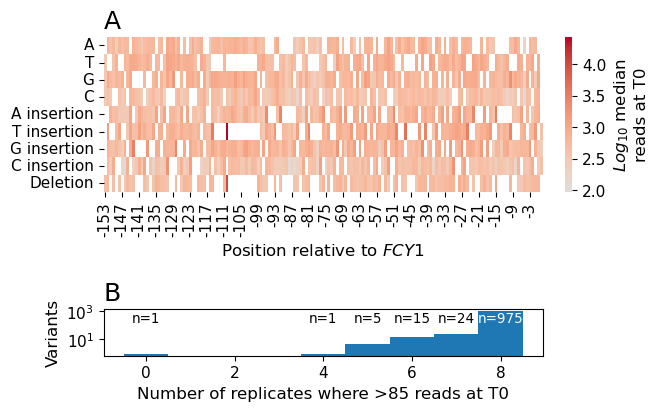

In [627]:
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["xtick.labelsize"] = 11

fig = plt.figure(constrained_layout=True, figsize=(6.48, 4))

grid = gridspec.GridSpec(ncols=1, nrows=14, figure=fig)
ax1 = fig.add_subplot(grid[0:10, 0])
ax2 = fig.add_subplot(grid[11:14, 0])

sns.heatmap(mat_counts, center=math.log10(85), cmap='coolwarm', cbar_kws={'label': r"$Log_{10}$ median" '\n' r"reads at T0"}, ax=ax1)

ax2.hist(variants_T0['N_libs'], log=True, bins=list(range(10)), align='left')

# Annotating the two figures
ax1.set_title('A', fontsize=18, loc='left')
ax1.set_ylabel('')
ax1.set_xlabel(r"Position relative to $\it{FCY1}$")

ax2.set_title('B', fontsize=18, loc='left')
ax2.set_xlabel('Number of replicates where >85 reads at T0')
ax2.set_ylabel('Variants')

ax2.annotate(f'n={variants_T0[variants_T0['N_libs'] == 0].shape[0]}', (0, 300), va='center', ha='center', fontsize=9.75)
ax2.annotate(f'n={variants_T0[variants_T0['N_libs'] == 4].shape[0]}', (4, 300), va='center', ha='center', fontsize=9.75)
ax2.annotate(f'n={variants_T0[variants_T0['N_libs'] == 5].shape[0]}', (5, 300), va='center', ha='center', fontsize=9.75)
ax2.annotate(f'n={variants_T0[variants_T0['N_libs'] == 6].shape[0]}', (6, 300), va='center', ha='center', fontsize=9.75)
ax2.annotate(f'n={variants_T0[variants_T0['N_libs'] == 7].shape[0]}', (7, 300), va='center', ha='center', fontsize=9.75)
ax2.annotate(f'n={variants_T0[variants_T0['N_libs'] == 8].shape[0]}', (8, 300), va='center', ha='center', fontsize=9.75, color='white')

# Saving the figure
FigS2 = plt.gcf()
FigS2.savefig('Supp_figs/S2Fig.tiff', bbox_inches='tight')